<h1>Phillip's Curve, does it still work?</h1>

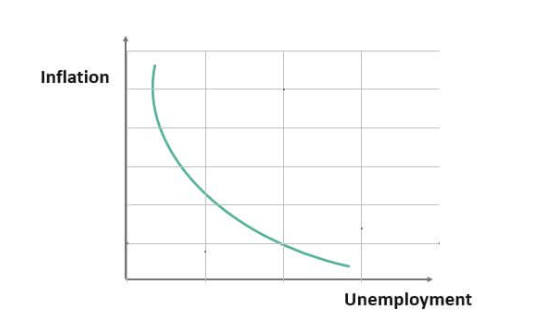

Phillip's curve is an economic theory that states that inflation and unemployment are inversly correlated.
I.E. When unemployement is low, inflation is expected to be high.

This theory has been proven to be inacurate through the famous 1970's stagflation (high unemployment and high inflation)


In [54]:
import requests
import json
import matplotlib.pyplot as plt

plt.style.use('classic')
plt.rcParams["figure.figsize"] = (9,7)

In [27]:
API_key = "HIDDEN :)"

def get_cpi(API_key):
    # Gets the data and stores it in a dict
    url = 'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey=' + API_key
    r = requests.get(url)
    data = r.json()
    return data

def get_unemployment_rate(API_key):
    # Gets the data and stores it in a dict
    url = 'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=' + API_key
    r = requests.get(url)
    data = r.json()
    return data


def yoy_growth_rate(data):
    yoy_growth = []
    for i in range(0, len(data)-12):
        yoy = round((data[i] - data[i+12]) / data[i+12] * 100, 1)
        yoy_growth.append(yoy)
    return yoy_growth




In [50]:
c = get_cpi(API_key)
n = 360 # number of data points
cpi_data, unemployment_rate = [], [] 

for i in range(n):
    cpi_data.append(float(c['data'][i]['value']))

cleaned_cpi = yoy_growth_rate(cpi_data)

In [51]:
u = get_unemployment_rate(API_key)
unemp =[]

for i in range(1, n - 11): # Jan CPI not released yet
    unemp.append(float(u['data'][i]['value']))


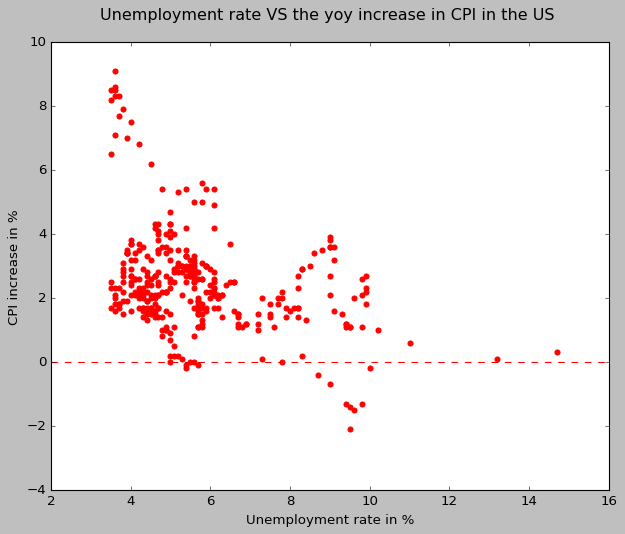

In [63]:
plt.scatter(unemp, cleaned_cpi, color="r")
plt.title("Unemployment rate VS the yoy increase in CPI in the US \n")
plt.ylabel("CPI increase in %")
plt.xlabel("Unemployment rate in %")
plt.axhline(0, linestyle="--",color="r")
plt.show()